Year
2001    77206
2002    30280
2003      119
2004       86
2005      111
2006       72
2007       94
2008      141
2009      120
2010       82
2011       67
2012       92
2013       96
2014      116
2015      135
2016      120
2017      149
2018      180
2019      114
2020      221
2021      242
2022      618
2023    13632
2024     2545
2025     1336
Name: ID, dtype: int64


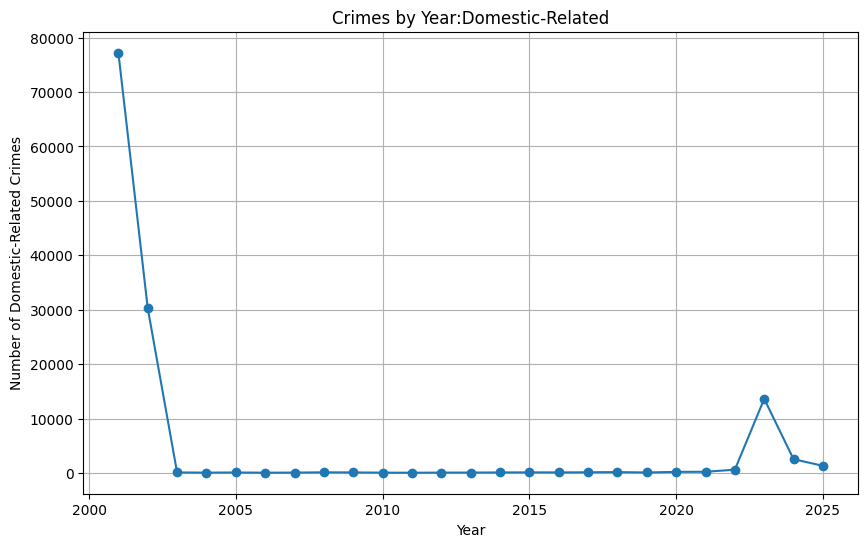

Question 1 Answer: Based on the last few years it does appear domestic related crimes are on the rise. Looking at the numbers and the graphs it shows there has been flucating since 2014 with a large rise occuring in 2023 and slowly going down again


In [58]:
import pandas as pd
import matplotlib.pyplot as plt

dfr = pd.read_csv('chicagocrimedata.zip', compression='zip')
dfr['Date'] = pd.to_datetime(dfr['Date'], errors='coerce')
dfr['Year'] = dfr['Date'].dt.year

domestic_crimes = dfr[dfr['Domestic'] == True]


crimes_by_year = domestic_crimes.groupby('Year')['ID'].count()

crime_counts_by_year = crimes_by_year[(crimes_by_year.index >= 2001) & (crimes_by_year.index <= 2025)]

print(crime_counts_by_year)


##---Crimes by Year for Domestic-Related Crimes---
plt.figure(figsize=(10, 6))
plt.plot(crime_counts_by_year.index, crime_counts_by_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Domestic-Related Crimes')
plt.title('Crimes by Year:Domestic-Related')
plt.grid(True)
plt.show()


print('Question 1 Answer: Based on the last few years it does appear domestic related crimes are on the rise. Looking at the numbers and the graphs it shows there has been flucating since 2014 with a large rise occuring in 2023 and slowly going down again')


Community Name  ALBANY PARK  ARCHER HEIGHTS  ARMOUR SQUARE  ASHBURN  \
Year                                                                  
2001                   20.0             5.0            5.0     24.0   
2002                  535.0           202.0          242.0    511.0   
2003                    8.0             1.0            2.0     21.0   
2004                    8.0             4.0            1.0     16.0   
2005                    9.0             3.0            1.0     13.0   
2006                    1.0             0.0            2.0     26.0   
2007                    5.0             3.0            2.0     12.0   
2008                   10.0             3.0            0.0     15.0   
2009                   11.0             4.0            2.0     23.0   
2010                    1.0             0.0            1.0     16.0   
2011                    2.0             1.0            1.0     12.0   
2012                    6.0             3.0            2.0     17.0   
2013  

/var/folders/sh/c7m7rdds6sx1l_xrq8d_5_1w0000gn/T/ipykernel_47885/244698870.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


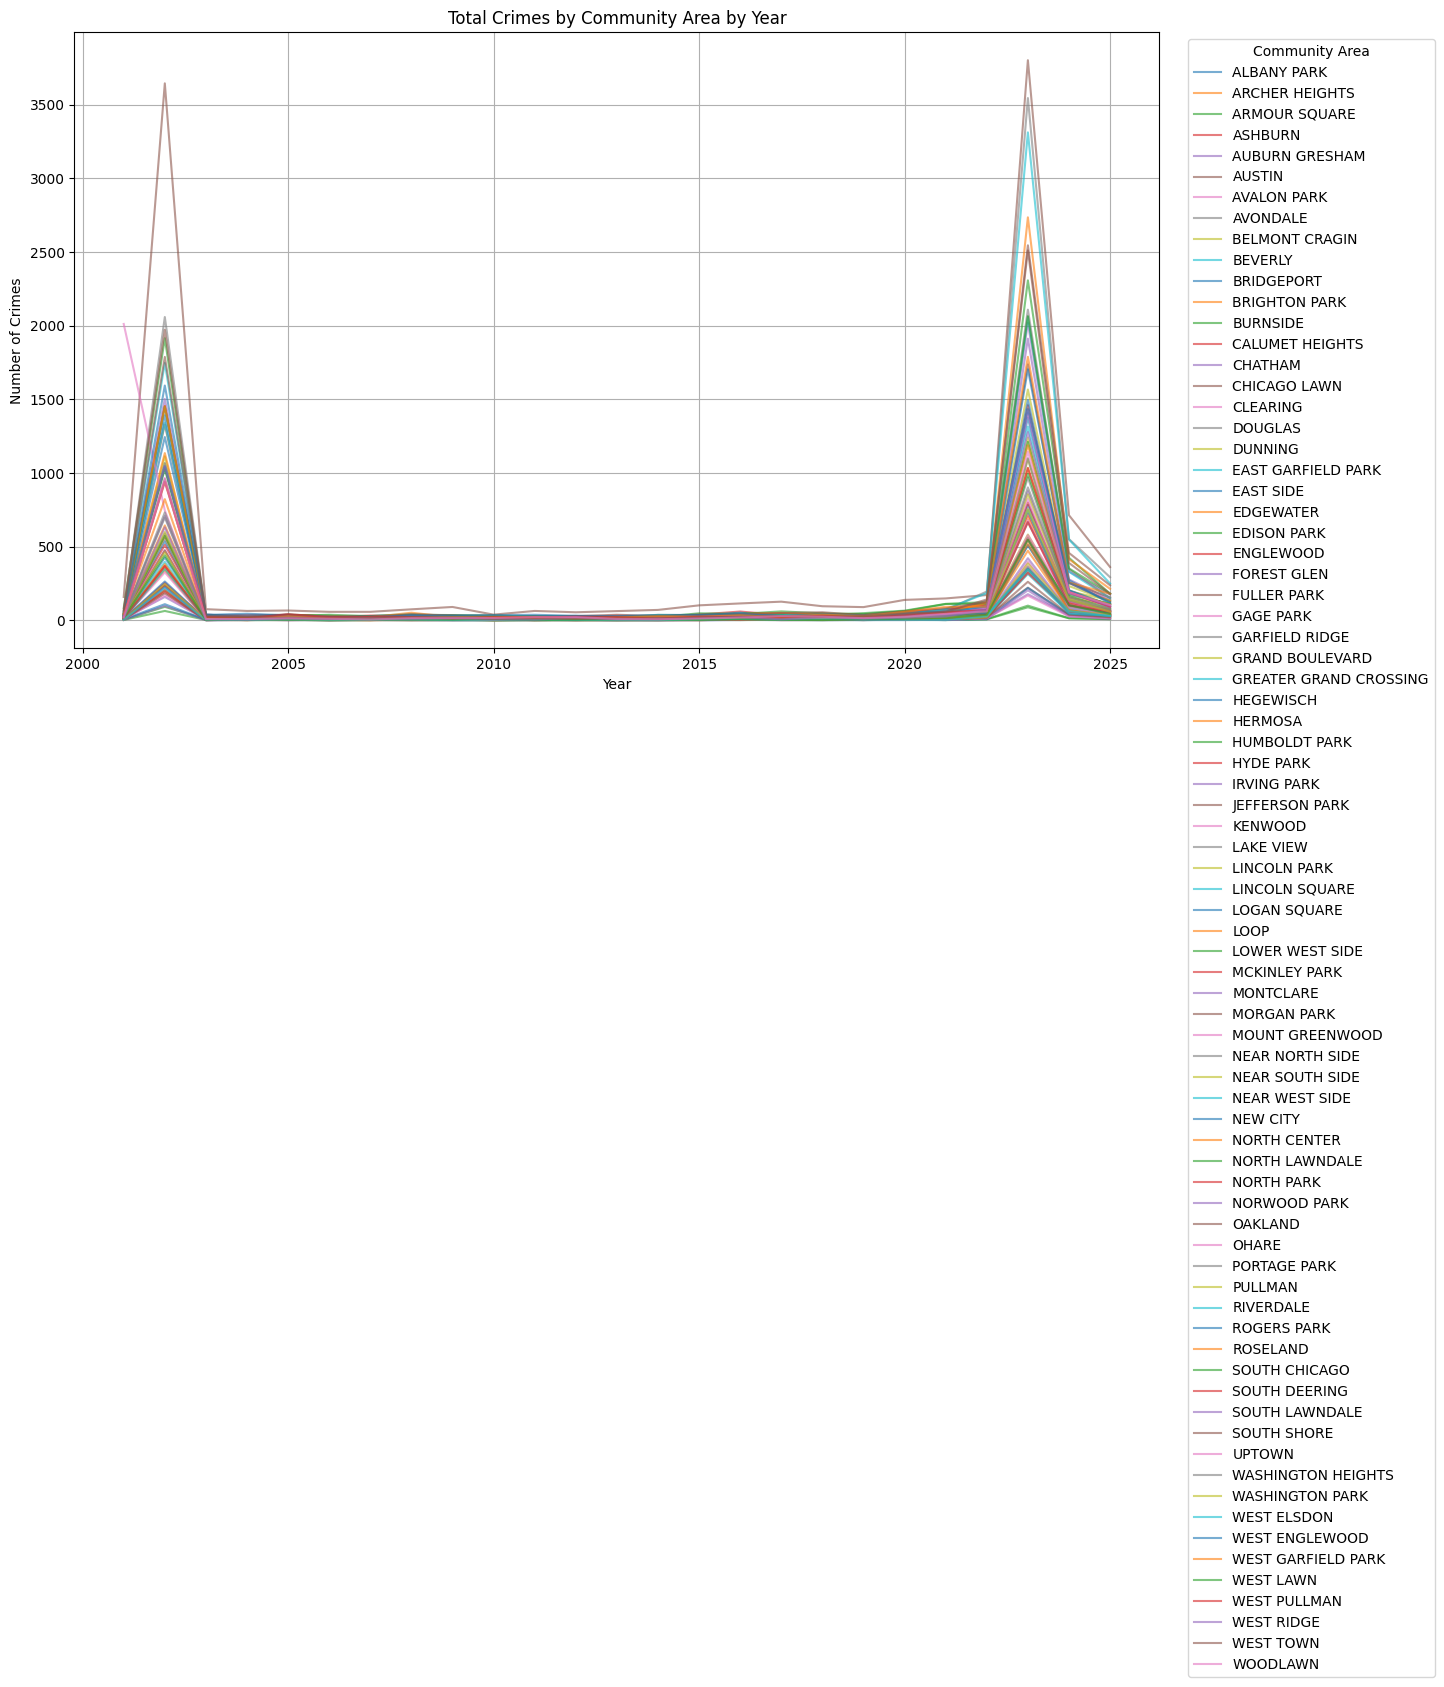

Question 2 Answer:
Total increase (2001 to 2025): CRIMINAL SEXUAL ASSAULT with 20 more reported crimes.
 Average increase per year: CRIMINAL SEXUAL ASSAULT with about 0.83 more crimes per year.
   
Primary Type   ARSON  ASSAULT  BATTERY  BURGLARY  \
Year                                               
2001          1009.0  31348.0  93379.0   25997.0   
2002           415.0  11521.0  33822.0    8692.0   
2003             0.0     33.0    112.0      15.0   
2004             3.0     46.0     96.0      20.0   
2005             0.0     49.0    113.0      23.0   
2006             1.0     38.0     82.0       4.0   
2007             0.0     37.0     74.0      24.0   
2008             1.0     29.0     68.0      26.0   
2009             0.0     38.0     98.0      22.0   
2010             0.0     18.0     51.0       9.0   
2011             1.0     33.0     63.0       6.0   
2012             0.0     44.0     41.0       7.0   
2013             1.0     25.0     36.0       8.0   
2014             0.0  

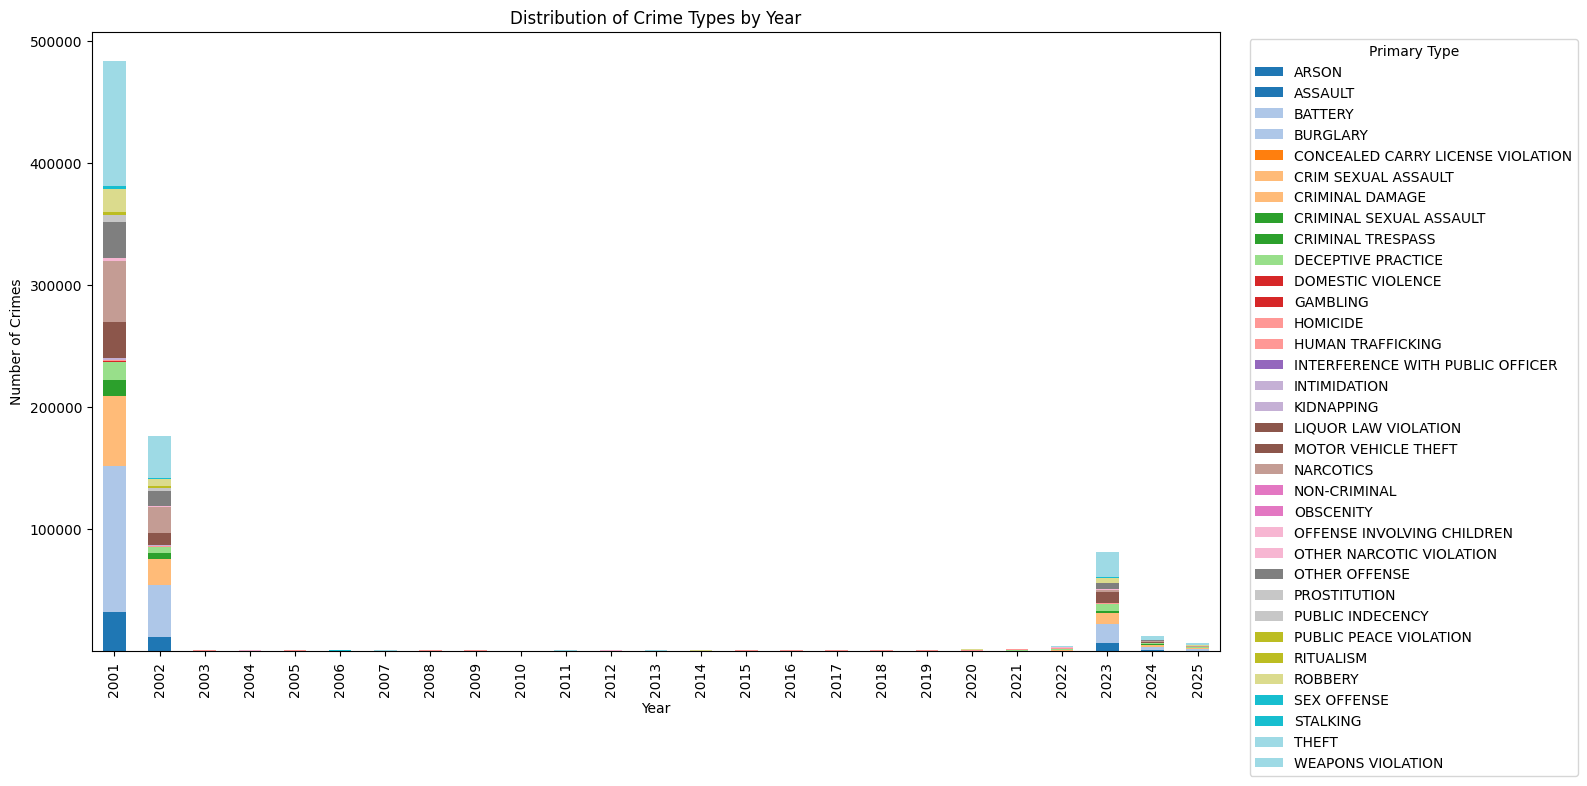

In [59]:
# Group by Year and Community Name
crimes_by_community = df.groupby(['Year', 'Community Name'])['ID'].count().unstack().fillna(0)
print(crimes_by_community)

# Plot: Crimes by Community Area over the years
crimes_by_community.plot(kind='line', figsize=(14, 8), alpha=0.6, legend=False)
plt.title('Total Crimes by Community Area by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.legend(title='Community Area', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

##Question 2
crimes_by_type = df.groupby(['Year', 'Primary Type'])['ID'].count().unstack().fillna(0)

crimes_by_type = crimes_by_type[crimes_by_type.index >= 2001]
start_year = 2001
end_year = crimes_by_type.index.max()

total_growth = crimes_by_type.loc[end_year] - crimes_by_type.loc[start_year]
top_total_crime = total_growth.idxmax()
top_total_value = int(total_growth.max())

years = end_year - start_year
avg_growth = total_growth / years
top_avg_crime = avg_growth.idxmax()
top_avg_value = avg_growth.max()

print(f"Question 2 Answer:")
print(f"Total increase (2001 to {end_year}): {top_total_crime} with {top_total_value} more reported crimes.")
print(f" Average increase per year: {top_avg_crime} with about {top_avg_value:.2f} more crimes per year.")

print('   ')

# --Distribution of Crime Types by Year---
crimes_by_type = df.groupby(['Year', 'Primary Type'])['ID'].count().unstack().fillna(0)
print(crimes_by_type)

crimes_by_type.plot(kind='bar', stacked=True, figsize=(16, 8), colormap='tab20')
plt.title('Distribution of Crime Types by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='Primary Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [ ]:
import folium as ft
from folium.plugins import HeatMap

df_filtered = df[['Latitude', 'Longitude', 'Primary Type']].dropna()
chicago_map = ft.Map(location=[41.8781, -87.6298], zoom_start=11)

crime_groups = df_filtered.groupby('Primary Type').agg({'Latitude': 'mean', 'Longitude': 'mean'}).reset_index()
print(crime_groups)

HeatMap(data=crime_groups[['Latitude', 'Longitude']].values).add_to(chicago_map)

chicago_map


                         Primary Type   Latitude  Longitude
0                               ARSON  41.839353 -87.680954
1                             ASSAULT  41.833662 -87.667386
2                             BATTERY  41.834358 -87.667659
3                            BURGLARY  41.847070 -87.675394
4   CONCEALED CARRY LICENSE VIOLATION  41.866086 -87.724428
5                 CRIM SEXUAL ASSAULT  41.833106 -87.665975
6                     CRIMINAL DAMAGE  41.842971 -87.673143
7             CRIMINAL SEXUAL ASSAULT  41.843447 -87.661031
8                   CRIMINAL TRESPASS  41.855342 -87.662906
9                  DECEPTIVE PRACTICE  41.863127 -87.671293
10                  DOMESTIC VIOLENCE  41.736176 -87.554320
11                           GAMBLING  41.837586 -87.673759
12                           HOMICIDE  41.802524 -87.679663
13                  HUMAN TRAFFICKING  41.851078 -87.688597
14   INTERFERENCE WITH PUBLIC OFFICER  41.841164 -87.663563
15                       INTIMIDATION  4

In [67]:
##Question 3
print("The heatmap does indicate a high concentration of crimes between South Lawnale and Bridgeport above Mckinley Park")

The heatmap does indicate a high concentration of crimes between South Lawnale and Bridgeport above Mckinley Park


In [61]:
##Question 4
non_domestic_arrests = df[(df['Domestic'] == False) & (df['Arrest'] == True)].copy()

# Extract Year and Month
non_domestic_arrests['Year'] = non_domestic_arrests['Date'].dt.year
non_domestic_arrests['Month'] = non_domestic_arrests['Date'].dt.month

# Group by Year and Month
arrest_counts = non_domestic_arrests.groupby(['Year', 'Month'])['ID'].count()

# Find the year/month with the max value
max_arrest_point = arrest_counts.idxmax()
max_arrest_count = arrest_counts.max()

print(f"Question 4 Answer: The largest number of non-domestic arrests occurred in {max_arrest_point[1]}/{max_arrest_point[0]}, with {max_arrest_count} arrests.")


Question 4 Answer: The largest number of non-domestic arrests occurred in 3/2001, with 11073 arrests.


/var/folders/sh/c7m7rdds6sx1l_xrq8d_5_1w0000gn/T/ipykernel_47885/3797286347.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=labels, showfliers=False)


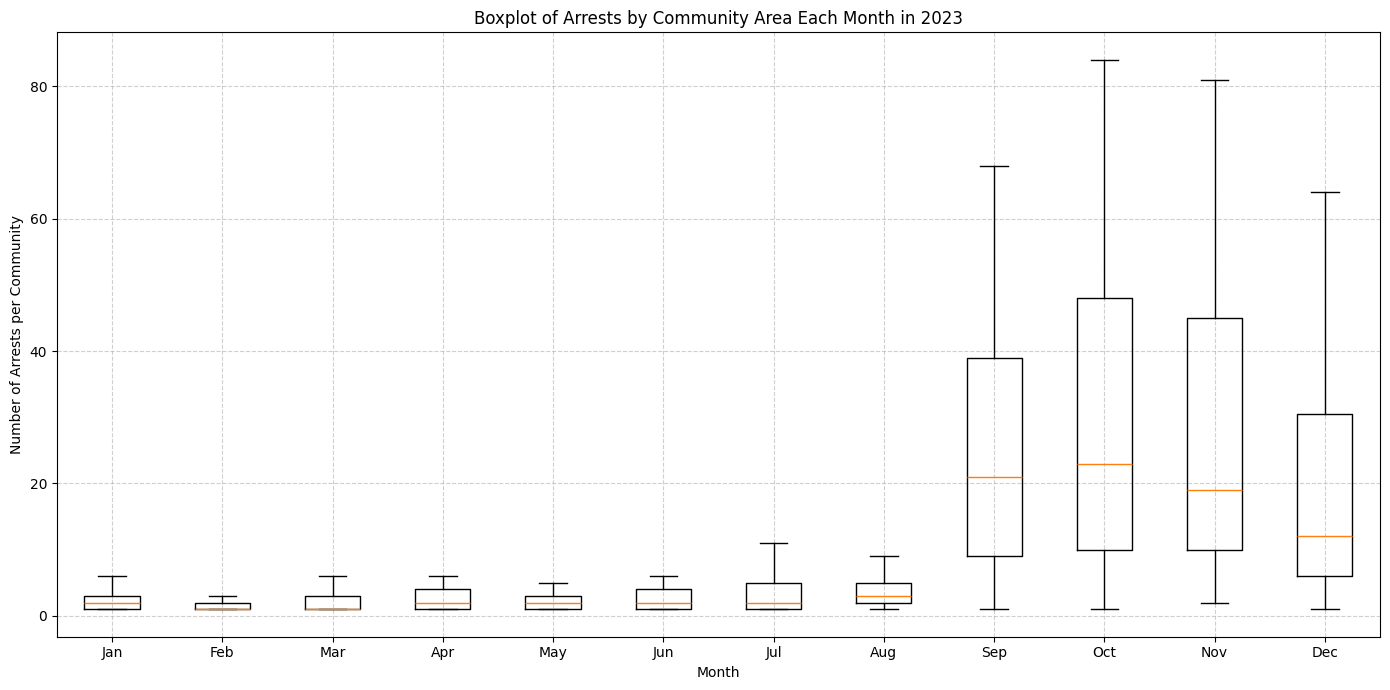

In [62]:
# ---Crimes by Community and Year---
community_map = pd.read_csv('CommAreas_20250411.csv')
community_map = community_map.rename(columns={
    'AREA_NUMBE': 'Community Area',
    'COMMUNITY': 'Community Name'
})

df = df.drop(columns=['Community Name'], errors='ignore')
df = df.merge(community_map[['Community Area', 'Community Name']], on='Community Area', how='left')

##filtered by 2023
df_2023 = df[(df['Year'] == 2023) & (df['Arrest'] == True)].copy()
df_2023['Month'] = df_2023['Date'].dt.month


boxplot_data = []
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for month in range(1, 13):
    monthly = df_2023[df_2023['Month'] == month]
    grouped = monthly.groupby('Community Name')['ID'].count()
    boxplot_data.append(grouped.values)

plt.figure(figsize=(14, 7))
plt.boxplot(boxplot_data, labels=labels, showfliers=False)
plt.title('Boxplot of Arrests by Community Area Each Month in 2023')
plt.xlabel('Month')
plt.ylabel('Number of Arrests per Community')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
